In [2]:
from pymongo import MongoClient
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from sympy import degree
from tqdm import tqdm
import math
import seaborn as sns
import powerlaw as plw
import datetime
import plotly.graph_objects as go
from reddit import plotting, network
from reddit import datahandling as dh
%load_ext autoreload
%autoreload 2

In [3]:
client = MongoClient('localhost', 27017)
db = client.reddit

def getUTC(date):
    return date.replace(tzinfo=datetime.timezone.utc).timestamp()

In [8]:
def plotDegreedistr(data, axis):
    edges = (np.vstack((data[:,3], data[:,4])))
    G = network.genNewNet(edges=edges)
    in_degr = np.array(G.in_degree())[:,1]
    alpha = plotting.plotpowerlaw(in_degr, axis, show_fit=True, discrete=False, xmin=10)
    return alpha


75697it [00:00, 173976.26it/s]


2.798721351053688
None


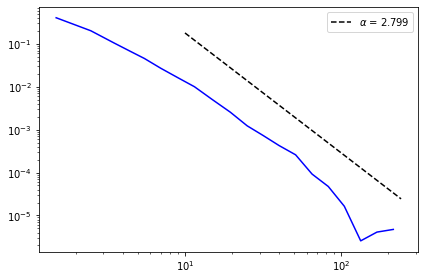

In [19]:
subreddits = ['politics', 'counting']
fig, axis = plt.subplots(1)
fig.set_figheight(4)
fig.set_figwidth(6)
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
color = ['blue', 'red', 'green']
start = getUTC(datetime.datetime(2020,1,1))
end = getUTC(datetime.datetime(2020,1,3))
subreddit = subreddits[0]
data = dh.getData(db,subreddit,start=start,end=end,which='comments', save=False)
alpha = plotDegreedistr(data,axis)
print(alpha)
axis.loglog()
axis.legend()